In [2]:
# ccp_alpha 값이 커지면 가지치기하는 노드수 증가, 작이지면 감소
# 가지치기 양을 조정하는 옵션

import pandas as pd

df = pd.read_csv('c:/data/customer/customer.csv')
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
df.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [6]:
train_cols = ["Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls']

X = df[train_cols]
y = df['Churn']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas) # 값이 크면 제거된 노드수가 증가
print(impurities) #노드의 불순도

[0.         0.00019908 0.00026042 0.00026445 0.00026491 0.00026538
 0.00031594 0.00037412 0.00038015 0.00038015 0.00038015 0.00038015
 0.00038197 0.00038197 0.00038768 0.00039094 0.00039295 0.00039309
 0.00039444 0.00039693 0.00039873 0.00039913 0.00040016 0.00040016
 0.00047358 0.00050914 0.00051515 0.00051849 0.00052346 0.00053355
 0.00053355 0.00053355 0.00060024 0.00060977 0.00060977 0.00066693
 0.00066693 0.00067847 0.0007114  0.00072029 0.00073343 0.0007503
 0.00075493 0.00076281 0.00076666 0.00076954 0.00077809 0.00078116
 0.0008161  0.00090036 0.00096038 0.00097442 0.00103476 0.00105485
 0.00131228 0.00169012 0.00186842 0.00205094 0.00216086 0.00219508
 0.00250862 0.00304989 0.00310298 0.00373953 0.00418187 0.00745216
 0.0078461  0.00952263 0.01230072 0.01620748 0.02223509 0.02556861]
[0.         0.00079632 0.00157758 0.00237094 0.00316567 0.0039618
 0.00554151 0.00628975 0.00705005 0.00857066 0.00933097 0.01009127
 0.01085521 0.01161915 0.01239452 0.01317639 0.01474819 0.01632

Text(0, 0.5, 'impurities')

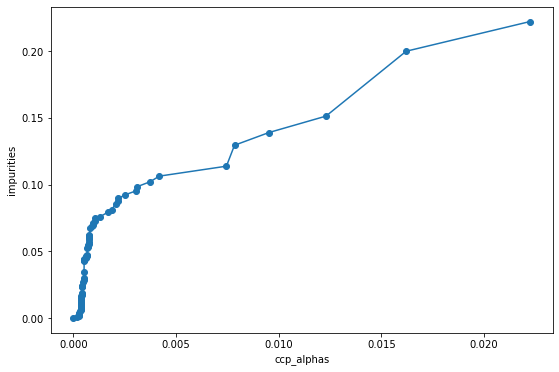

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')
plt.xlabel('ccp_alphas')
plt.ylabel('impurities')

In [10]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,
    ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

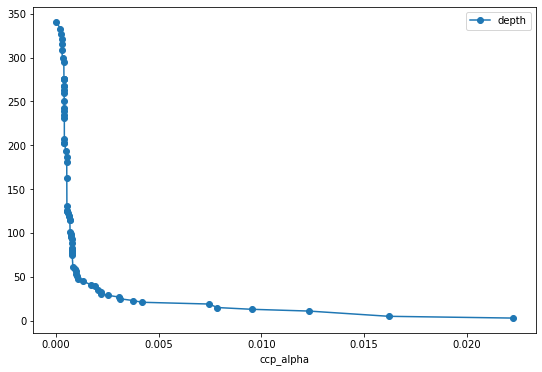

In [11]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(9, 6))
plt.plot(ccp_alphas, node_counts, marker='o', label='depth')
plt.xlabel('ccp_alpha')
plt.legend()

최고 정확도: 0.9616306954436451
최적의 alpha: 0.0008161045299304866


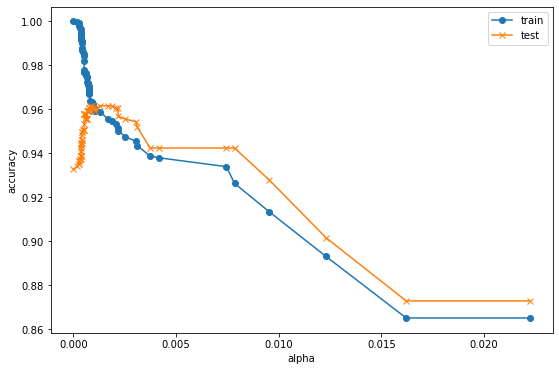

In [12]:
import numpy as np

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

m = max(test_scores)
i = np.argmax(test_scores)
print('최고 정확도:', m)
print('최적의 alpha:', ccp_alphas[i])

plt.figure(figsize=(9,6))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alphas, train_scores, marker='o', label='train')
plt.plot(ccp_alphas, test_scores, marker='x', label='test')
plt.legend()